In [1]:
import numpy as np
from scipy.spatial import distance
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Generating a synthetic dataset
X, y = ds.make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# Adding some anomalous data
rng = np.random.default_rng(seed=42)
anomalous_data = rng.uniform(low=-3, high=0, size=(50, 2))
X = np.vstack([X, anomalous_data])
y = np.hstack([y, np.ones(anomalous_data.shape[0])])

In [3]:
# Split the combined data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
type(X_train)

numpy.ndarray

In [4]:
class rnsa:
    
    # Initialize the class
    def __init__(self, radius):
        self.radius = radius
        self.detectors = []
        
    def fit(self, X_normal):
        for _ in range(1000):  # Generate a fixed number of detectors
            candidate_detector = np.random.uniform(low=-5, high=4, size=X_normal.shape[1]) # Generate a random detector
            if all(distance.euclidean(candidate_detector, x) > self.radius for x in X_normal): # Check if the detector is valid
                self.detectors.append(candidate_detector) # Add the detector to the list of detectors

    def predict(self, X): # Predict if a point is an anomaly
        predictions = [] # Initialize the list of predictions
        for x in X:
            is_anomaly = any(distance.euclidean(x, detector) <= self.radius for detector in self.detectors) # Check if the point is within the radius of any detector
            predictions.append(int(is_anomaly))
        return np.array(predictions)

In [5]:
model = rnsa(radius=0.5) # Set the radius to 0.5
model.fit(X_train[y_train == 0]) # Fit the model on the normal data
y_pred = model.predict(X_test) # Predict on the test data 
print(f"Accuracy: {np.mean(y_pred == y_test) * 100} %") # Print the accuracy

Accuracy: 95.45454545454545 %


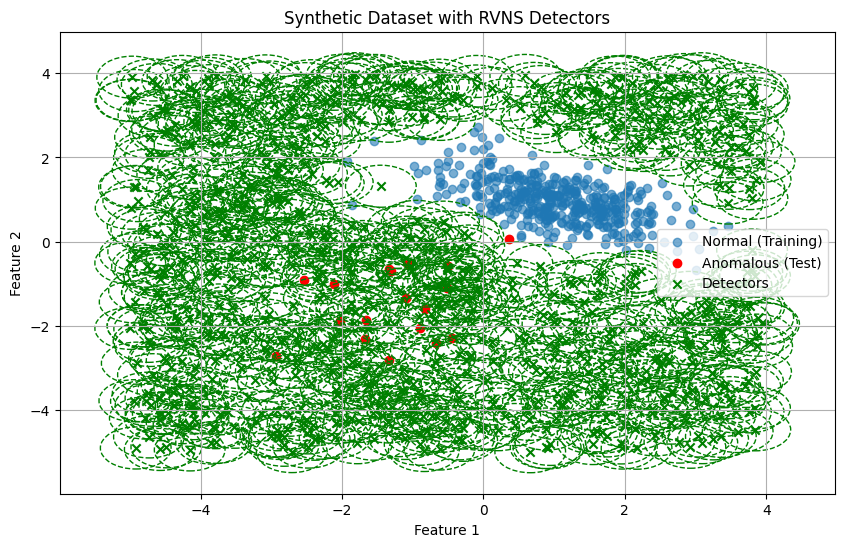

In [8]:
# Visualize the dataset along with the detectors
plt.figure(figsize=(10, 6))

# Plot normal and anomalous data points
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Normal (Training)', alpha=0.6)
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label='Anomalous (Test)', c='red')

# Plot the detectors generated by the RVNS algorithm
x_values = [detector[0] for detector in model.detectors]
y_values = [detector[1] for detector in model.detectors]

plt.scatter(x_values, y_values, label='Detectors', c='green', marker='x')

# Add a circle around each detector to visualize its radius
for detector in model.detectors:
    circle = plt.Circle(detector, model.radius, color='green', fill=False, linestyle='dashed')
    plt.gca().add_patch(circle)

plt.title('Synthetic Dataset with RVNS Detectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()